# Group Assignment PBD PL1 - Multinomial Logistic Regression & Decision Tree Classifier
## Book 1 of 3: Data Cleaning and Exploratory Data Analysis


Authors:

Catarina Castanheira Nº 92478

João Martins Nº 93259

Joel Paula Nº 93392


Read data from SQLite database. Only read table `collisions`.

In [1]:
# Make sure you download the JDBC driver for sql Lite from Maven repository
# https://repo1.maven.org/maven2/org/xerial/sqlite-jdbc/3.34.0/sqlite-jdbc-3.34.0.jar
# and put it in the $SPARK_HOME/jars/
spark.conf.set("spark.sql.repl.eagerEval.enabled",True) # pretty print tables
df = sqlContext.read.format('jdbc').\
     options(url='jdbc:sqlite:switrs.sqlite',\
     dbtable='collisions',driver='org.sqlite.JDBC').load()

In [2]:
df.printSchema()

root
 |-- case_id: string (nullable = true)
 |-- jurisdiction: long (nullable = true)
 |-- officer_id: string (nullable = true)
 |-- reporting_district: string (nullable = true)
 |-- chp_shift: string (nullable = true)
 |-- population: string (nullable = true)
 |-- county_city_location: string (nullable = true)
 |-- special_condition: string (nullable = true)
 |-- beat_type: string (nullable = true)
 |-- chp_beat_type: string (nullable = true)
 |-- city_division_lapd: string (nullable = true)
 |-- chp_beat_class: string (nullable = true)
 |-- beat_number: string (nullable = true)
 |-- primary_road: string (nullable = true)
 |-- secondary_road: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- direction: string (nullable = true)
 |-- intersection: long (nullable = true)
 |-- weather_1: string (nullable = true)
 |-- weather_2: string (nullable = true)
 |-- state_highway_indicator: long (nullable = true)
 |-- caltrans_county: string (nullable = true)
 |-- caltrans_dist

In [4]:
df.limit(10)

case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,special_condition,beat_type,chp_beat_type,city_division_lapd,chp_beat_class,beat_number,primary_road,secondary_road,distance,direction,intersection,weather_1,weather_2,state_highway_indicator,caltrans_county,caltrans_district,state_route,route_suffix,postmile_prefix,postmile,location_type,ramp_intersection,side_of_highway,tow_away,collision_severity,killed_victims,injured_victims,party_count,primary_collision_factor,pcf_violation_code,pcf_violation_category,pcf_violation,pcf_violation_subsection,hit_and_run,type_of_collision,motor_vehicle_involved_with,pedestrian_action,road_surface,road_condition_1,road_condition_2,lighting,control_device,chp_road_type,pedestrian_collision,bicycle_collision,motorcycle_collision,truck_collision,not_private_property,alcohol_involved,statewide_vehicle_type_at_fault,chp_vehicle_type_at_fault,severe_injury_count,other_visible_injury_count,complaint_of_pain_injury_count,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,primary_ramp,secondary_ramp,latitude,longitude,collision_date,collision_time,process_date
0081715,1941,11342,212,5,7,1941,0,0,not chp,null,not chp,003,PATTERSON ST,ATLANTIC AV,0.0,null,1,cloudy,null,0,null,null,null,null,null,null,null,null,null,1,property damage only,0,0,2,vehicle code viol...,null,speeding,22350,null,not hit and run,rear end,other motor vehicle,no pedestrian inv...,dry,normal,null,daylight,none,0,null,null,null,null,1,null,null,null,0,0,0,0,0,0,0,0,0,null,null,null,null,2020-03-14,07:45:00,2020-06-22
0726202,3600,8945,064,5,5,3612,0,0,not chp,null,not chp,005,AMARGOSA,MARICOPA RD,0.0,null,null,clear,null,0,null,null,null,null,null,null,null,null,null,1,property damage only,0,0,1,vehicle code viol...,null,speeding,22350,null,misdemeanor,hit object,fixed object,no pedestrian inv...,dry,normal,null,dark with street ...,none,0,null,null,null,null,1,null,passenger car,01,0,0,0,0,0,0,0,0,0,null,null,null,null,2020-07-26,02:50:00,2020-09-30
3493128,9860,016616,null,2,9,3600,0,1,interstate,null,chp other,151,RT 15,LYTLE CREEK WASH,120.0,north,0,clear,null,1,SBD,8,15,null,null,13.1,highway,null,northbound,0,property damage only,0,0,2,vehicle code viol...,null,improper turning,22107,null,not hit and run,sideswipe,other motor vehicle,no pedestrian inv...,dry,normal,null,daylight,none,1,null,null,null,1,1,null,other vehicle,47,0,0,0,0,0,0,0,0,0,null,null,null,null,2008-01-02,15:15:00,2008-08-20
3495044,9540,17076,null,1,9,1900,0,1,interstate,null,chp other,506,RT 5,RT 126,1000.0,south,0,clear,null,1,LA,7,5,null,R,55.29,highway,null,northbound,0,property damage only,0,0,2,vehicle code viol...,null,speeding,22350,null,not hit and run,rear end,other motor vehicle,no pedestrian inv...,dry,construction,null,daylight,none,1,null,null,null,1,1,null,truck or truck tr...,26,0,0,0,0,0,0,0,0,0,null,null,null,null,2008-01-02,11:30:00,2008-11-10
3503560,4316,15949,52,5,6,4316,0,0,not chp,null,not chp,005,RT 82,MATHILDA AV,30.0,west,0,clear,null,1,SCL,4,82,null,null,17.03,highway,null,northbound,0,property damage only,0,0,2,vehicle code viol...,null,automobile right ...,21804,A,not hit and run,broadside,other motor vehicle,no pedestrian inv...,dry,normal,null,daylight,functioning,0,null,null,null,null,1,null,passenger car,07,0,0,0,0,0,0,0,0,0,null,null,null,null,2008-01-07,08:36:00,2008-09-23
3507861,3010,007,476,5,6,3010,0,0,not chp,null,not chp,002,BANNING,BROOKHURST,15.0,west,0,clear,null,0,null,null,null,null,null,null,null,null,null,1,property damage only,0,0,2,vehicle code viol...,null,dui,23152,A,misdemeanor,broadside,other motor vehicle,no pedestrian inv...,dry,normal,null,daylight,functioning,0,null,null,null,1,1,1,passenger car,01,0,0,0,0,0,0,0,0,0,null,null,null,null,2008-01-07,12:46:00,2008-08-15
3507869,3604,P883,null,5,6,3604,0,0,not chp,null,not chp,004,SANTA ANA,POPLAR,250.0,east,0,clea

Number of rows in dataset.

In [8]:
'{:,}'.format(df.count())

'9,172,565'

# Get a sample of the dataset.

Grab just 1.1% of the whole file (around 100k lines), so that we can tackle it on our individual machines. We tried larger samples (above 40% of the whole dataset) but it wasn't viable, due to it generating systematic errors for lack of memory and server unavailability.

In [3]:
import random
random.seed(42)
df_random_1percent = df.sample(withReplacement=False, fraction=0.011, seed=42)
df_random_1percent_rows = df_random_1percent.count()
print("rows:", '{:,}'.format(df_random_1percent_rows))
df_random_1percent.limit(6)

case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,special_condition,beat_type,chp_beat_type,city_division_lapd,chp_beat_class,beat_number,primary_road,secondary_road,distance,direction,intersection,weather_1,weather_2,state_highway_indicator,caltrans_county,caltrans_district,state_route,route_suffix,postmile_prefix,postmile,location_type,ramp_intersection,side_of_highway,tow_away,collision_severity,killed_victims,injured_victims,party_count,primary_collision_factor,pcf_violation_code,pcf_violation_category,pcf_violation,pcf_violation_subsection,hit_and_run,type_of_collision,motor_vehicle_involved_with,pedestrian_action,road_surface,road_condition_1,road_condition_2,lighting,control_device,chp_road_type,pedestrian_collision,bicycle_collision,motorcycle_collision,truck_collision,not_private_property,alcohol_involved,statewide_vehicle_type_at_fault,chp_vehicle_type_at_fault,severe_injury_count,other_visible_injury_count,complaint_of_pain_injury_count,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,primary_ramp,secondary_ramp,latitude,longitude,collision_date,collision_time,process_date
3495044,9540,17076,null,1,9,1900,0,1,interstate,null,chp other,506,RT 5,RT 126,1000.0,south,0,clear,null,1,LA,7,5,null,R,55.29,highway,null,northbound,0,property damage only,0,0,2,vehicle code viol...,null,speeding,22350,null,not hit and run,rear end,other motor vehicle,no pedestrian inv...,dry,construction,null,daylight,none,1,null,null,null,1,1,null,truck or truck tr...,26,0,0,0,0,0,0,0,0,0,null,null,null,null,2008-01-02,11:30:00,2008-11-10
3511130,9480,9680,null,1,9,5400,0,3,county road area,null,chp other,006,ROAD 188,AVENUE 242,1320.0,south,0,cloudy,null,0,null,null,null,null,null,null,null,null,null,1,property damage only,0,0,2,vehicle code viol...,null,improper turning,22107,null,not hit and run,broadside,other motor vehicle,no pedestrian inv...,wet,normal,null,dark with no stre...,none,0,null,null,null,1,1,null,truck or truck tr...,27,0,0,0,0,0,0,0,0,0,null,null,null,null,2008-01-09,06:30:00,2008-08-08
3511299,109,8284,1,5,7,0109,0,0,not chp,null,not chp,06X,WEST MACARTHUR BL,MARKET ST,0.0,null,1,raining,null,0,null,null,null,null,null,null,null,null,null,1,property damage only,0,0,2,vehicle code viol...,null,automobile right ...,21800,D,not hit and run,broadside,other motor vehicle,no pedestrian inv...,wet,normal,null,daylight,not functioning,0,null,null,null,null,1,null,passenger car,01,0,0,0,0,0,0,0,0,0,null,null,null,null,2008-01-04,13:51:00,2008-08-08
3511310,1900,489624,2611,5,6,1950,0,0,not chp,null,not chp,262T1,PALMDALE BL,RT 14,0.0,null,1,clear,null,1,LA,7,138,null,null,43.531,intersection,5,eastbound,1,other injury,0,1,2,unknown,null,unknown,null,null,not hit and run,head-on,other motor vehicle,no pedestrian inv...,dry,normal,null,daylight,functioning,0,null,null,null,1,1,null,null,null,0,1,0,0,0,0,0,0,0,null,NF,null,null,2008-01-14,07:30:00,2008-10-25
3511315,9655,009175,null,1,9,3300,0,3,county road area,null,chp other,002,BONITA AV,BROADWAY ST,5.0,east,0,cloudy,null,0,null,null,null,null,null,null,null,null,null,1,property damage only,0,0,1,vehicle code viol...,null,speeding,22350,null,not hit and run,overturned,non-collision,no pedestrian inv...,dry,normal,null,daylight,none,0,null,null,null,1,1,null,truck or truck tr...,79,0,0,0,0,0,0,0,0,0,null,null,null,null,2008-01-08,08:41:00,2008-08-11
3511330,9755,017269,null,3,9,4200,0,1,us highway,null,chp other,004,RT 101,NOJOQUI CREEK BRI...,50.0,north,0,clear,null,1,SB,5,101,null,null,56.04,highway,null,southbound,1,property damage only,0,0,1,vehicle code viol...,null,improper turning,22107,null,not hit and run,hit object,fixed object,no pedestrian inv...,dry,normal,null,dark with no stre...,none,1,null,null,null,1,1,null,truck or truck tr...,26,0,0,0,0,0,0,0,0,0,null,null,null,null,2008-01-10,00:35:00,2008-08-20


Count the rows with missing values.

In [4]:
'{:,}'.format(df_random_1percent.dropna().count())

'0'

Every row has at least one column with a missing value.

# Data cleaning

We now define categorical and numerical variables, to use further on.

In [5]:
col_names = df_random_1percent.columns
col_names_categorical = [col for (col, dataType) in df_random_1percent.dtypes if dataType == 'string']
col_names_numeric = [col for col in col_names if col not in col_names_categorical]        
col_names_categorical

['case_id',
 'officer_id',
 'reporting_district',
 'chp_shift',
 'population',
 'county_city_location',
 'special_condition',
 'beat_type',
 'chp_beat_type',
 'city_division_lapd',
 'chp_beat_class',
 'beat_number',
 'primary_road',
 'secondary_road',
 'direction',
 'weather_1',
 'weather_2',
 'caltrans_county',
 'route_suffix',
 'postmile_prefix',
 'location_type',
 'side_of_highway',
 'collision_severity',
 'primary_collision_factor',
 'pcf_violation_code',
 'pcf_violation_category',
 'pcf_violation_subsection',
 'hit_and_run',
 'type_of_collision',
 'motor_vehicle_involved_with',
 'pedestrian_action',
 'road_surface',
 'road_condition_1',
 'road_condition_2',
 'lighting',
 'control_device',
 'chp_road_type',
 'statewide_vehicle_type_at_fault',
 'chp_vehicle_type_at_fault',
 'primary_ramp',
 'secondary_ramp',
 'collision_date',
 'collision_time',
 'process_date']

In [6]:
# show number of categoricakl columns
len(col_names_categorical)

44

In [7]:
# Show numerical like columns
col_names_numeric

['jurisdiction',
 'distance',
 'intersection',
 'state_highway_indicator',
 'caltrans_district',
 'state_route',
 'postmile',
 'ramp_intersection',
 'tow_away',
 'killed_victims',
 'injured_victims',
 'party_count',
 'pcf_violation',
 'pedestrian_collision',
 'bicycle_collision',
 'motorcycle_collision',
 'truck_collision',
 'not_private_property',
 'alcohol_involved',
 'severe_injury_count',
 'other_visible_injury_count',
 'complaint_of_pain_injury_count',
 'pedestrian_killed_count',
 'pedestrian_injured_count',
 'bicyclist_killed_count',
 'bicyclist_injured_count',
 'motorcyclist_killed_count',
 'motorcyclist_injured_count',
 'latitude',
 'longitude']

In [8]:
len(col_names_numeric)

30

Remove columns that have no interesting information for our purpose.

In [9]:
remove_cols = ["case_id", "process_date", "officer_id"]

for col in remove_cols:
    col_names.remove(col)
    col_names_categorical.remove(col)
    df_random_1percent = df_random_1percent.drop(col)


For each column, check the proportion of missing values.

In [ ]:
total = df_random_1percent.count()
for col in col_names:
    print("percentage of missing:", col, round((1 - df_random_1percent.select(col).dropna().count() / total) * 100, 2), "%" )


Eliminate the following Columns, given that they contain very few rows with data.

In [10]:
remove_cols = ["secondary_ramp", "primary_ramp", "latitude", "longitude", "reporting_district"]

for col in remove_cols:
    if col in col_names_categorical: 
        col_names_categorical.remove(col)
    elif col in col_names_numeric:
        col_names_numeric.remove(col)
    if col in col_names:
        col_names.remove(col)
    df_random_1percent = df_random_1percent.drop(col)

In [11]:
df_random_1percent.printSchema()

root
 |-- jurisdiction: long (nullable = true)
 |-- chp_shift: string (nullable = true)
 |-- population: string (nullable = true)
 |-- county_city_location: string (nullable = true)
 |-- special_condition: string (nullable = true)
 |-- beat_type: string (nullable = true)
 |-- chp_beat_type: string (nullable = true)
 |-- city_division_lapd: string (nullable = true)
 |-- chp_beat_class: string (nullable = true)
 |-- beat_number: string (nullable = true)
 |-- primary_road: string (nullable = true)
 |-- secondary_road: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- direction: string (nullable = true)
 |-- intersection: long (nullable = true)
 |-- weather_1: string (nullable = true)
 |-- weather_2: string (nullable = true)
 |-- state_highway_indicator: long (nullable = true)
 |-- caltrans_county: string (nullable = true)
 |-- caltrans_district: long (nullable = true)
 |-- state_route: long (nullable = true)
 |-- route_suffix: string (nullable = true)
 |-- postmile_pre

Some of the numerical columns are actually categorical and vice versa. We make the necessary changes here.

In [12]:
 from pyspark.sql.types import StringType

df_random_1percent = df_random_1percent.withColumn("jurisdiction", df_random_1percent['jurisdiction'].cast(StringType()))\
    .withColumn("caltrans_district", df_random_1percent['caltrans_district'].cast(StringType()))\
    .withColumn("ramp_intersection", df_random_1percent['ramp_intersection'].cast(StringType()))\
    .withColumn("state_route", df_random_1percent['state_route'].cast(StringType()))\
    .withColumn("pcf_violation", df_random_1percent['pcf_violation'].cast(StringType()))\
    .withColumn("postmile", df_random_1percent['postmile'].cast(StringType()))


col_names_categorical.append("jurisdiction")
col_names_numeric.remove("jurisdiction")
col_names_categorical.append("caltrans_district")
col_names_numeric.remove("caltrans_district")
col_names_categorical.append("state_route")
col_names_numeric.remove("state_route")
col_names_categorical.append("ramp_intersection")
col_names_numeric.remove("ramp_intersection")
col_names_categorical.append("pcf_violation")
col_names_numeric.remove("pcf_violation")
col_names_categorical.append("postmile")
col_names_numeric.remove("postmile")


According to the data source documentation columns "pedestrian_collision", "bicycle_collision", "motorcycle_collision", "truck_collision", "not_private_property", "alcohol_involved" are binary variables, but currently they only have ones or nulls:

In [13]:
col_names_na_to_zero = ["pedestrian_collision", "bicycle_collision", "motorcycle_collision", "truck_collision", "not_private_property", "alcohol_involved"]
for col in col_names_na_to_zero:
    df_random_1percent.groupBy(col).count().show()

+--------------------+-------+
|pedestrian_collision|  count|
+--------------------+-------+
|                null|3560137|
|                   1| 111261|
+--------------------+-------+

+-----------------+-------+
|bicycle_collision|  count|
+-----------------+-------+
|             null|3570488|
|                1| 100910|
+-----------------+-------+

+--------------------+-------+
|motorcycle_collision|  count|
+--------------------+-------+
|                null|3563063|
|                   1| 108335|
+--------------------+-------+

+---------------+-------+
|truck_collision|  count|
+---------------+-------+
|           null|3458898|
|              1| 212500|
+---------------+-------+

+--------------------+-------+
|not_private_property|  count|
+--------------------+-------+
|                null|      1|
|                   1|3671397|
+--------------------+-------+

+----------------+-------+
|alcohol_involved|  count|
+----------------+-------+
|            null|3305637|
|    

Variable "not_private_property" seems to have only "1", so not enough variability. Should we eliminate it?

In [14]:
df.groupBy("not_private_property").count().show()

+--------------------+-------+
|not_private_property|  count|
+--------------------+-------+
|                null|      2|
|                   1|9172563|
+--------------------+-------+



Is this an isolated case or does it happen for other variables?

In [ ]:
for col in col_names:
    dfCount = df_random_1percent.groupBy(col).count()
    if dfCount.orderBy("count", ascending=False).first()["count"] / df_random_1percent_rows > 0.95:
        dfCount.orderBy("count", ascending=False).show(50)


Given that the column "not_private_property" has no diversity, we eliminate it. Other columns are OK.

In [16]:
df_random_1percent = df_random_1percent.drop("not_private_property")
col_names_numeric.remove("not_private_property")
col_names_na_to_zero = ["pedestrian_collision", "bicycle_collision", "motorcycle_collision", "truck_collision", "alcohol_involved"]

Given this, we decided to substitute nulls with zeros for these columns:

In [17]:
# for these columns, missings are 0 (they only have 1s)
df_clean = df_random_1percent.fillna(0, subset=col_names_na_to_zero)
df_clean.printSchema()

root
 |-- jurisdiction: string (nullable = true)
 |-- chp_shift: string (nullable = true)
 |-- population: string (nullable = true)
 |-- county_city_location: string (nullable = true)
 |-- special_condition: string (nullable = true)
 |-- beat_type: string (nullable = true)
 |-- chp_beat_type: string (nullable = true)
 |-- city_division_lapd: string (nullable = true)
 |-- chp_beat_class: string (nullable = true)
 |-- beat_number: string (nullable = true)
 |-- primary_road: string (nullable = true)
 |-- secondary_road: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- direction: string (nullable = true)
 |-- intersection: long (nullable = true)
 |-- weather_1: string (nullable = true)
 |-- weather_2: string (nullable = true)
 |-- state_highway_indicator: long (nullable = true)
 |-- caltrans_county: string (nullable = true)
 |-- caltrans_district: string (nullable = true)
 |-- state_route: string (nullable = true)
 |-- route_suffix: string (nullable = true)
 |-- postmi

Let's analyze missing values in the numeric columns.

In [18]:
df_clean.describe(col_names_numeric)

summary,distance,intersection,state_highway_indicator,tow_away,killed_victims,injured_victims,party_count,pedestrian_collision,bicycle_collision,motorcycle_collision,truck_collision,alcohol_involved,severe_injury_count,other_visible_injury_count,complaint_of_pain_injury_count,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count
count,3671397,3634206,3670736,3648464,3670592,3670433,3671395,3671398,3671398,3671398,3671398,3671398,3671398,3671398,3671398,3671398,3671398,3671398,3671398,3671398,3671397
mean,683.7525707380543,0.23251131058613628,0.37704291455446537,0.5067853211652904,0.007660072271720747,0.5617606968987038,1.9821484748985059,0.030304804872694272,0.02748544287489398,0.02950783325588781,0.05787985938871242,0.09962444823470515,0.02735061684949439,0.14965797769677927,0.3846041753032496,0.001622270317737276,0.02879829427373442,2.960725042613195...,0.024744525110053445,9.315252663971599E-4,0.024178534764832026
stddev,15320.06863892608,0.42243324932881027,0.48464586981253005,0.49995402581243786,0.09709128062491373,0.8848617193324457,0.6787124900534167,0.17142471139971133,0.16349312091175813,0.1692250833431345,0.2335161581528144,0.29949865104971646,0.18547422836025187,0.42652951985553794,0.7429998901831693,0.040935906363699356,0.1785962496042149,0.017251642856584166,0.15804333235299176,0.03125638623844645,0.1637031311889349
min,-396000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
max,9488160.0,1,1,1,9,63,92,1,1,1,1,1,28,26,52,4,26,2,6,4,9


Find out the mode for killed victims and substitute missing for mode.

In [19]:
df_clean.groupBy("killed_victims").count().orderBy("count", ascending=False)


killed_victims,count
0,3645041
1,23536
2,1632
null,806
3,259
4,92
5,25
6,5
9,1
8,1


In [20]:
df_clean = df_clean.fillna(0, subset="killed_victims")

Do the same for "injured_victims".

In [21]:
# find out the mode for injured victims
df_clean.groupBy("injured_victims").count().orderBy("count", ascending=False)

injured_victims,count
0,2237443
1,1015191
2,283742
3,87263
4,29507
5,10699
6,3853
7,1470
null,965
8,604


So, we set missing values to the mode - zero.

In [22]:
df_clean = df_clean.fillna(0, subset="injured_victims")

For the binary variables with missing values, we add a new "category" missing as 2:

In [23]:
missing_binary_cols = ["intersection", "state_highway_indicator", "tow_away"]
df_clean = df_clean.fillna(2, subset=missing_binary_cols)

For our target variable - collision_severity - we check its contents.

In [32]:
# Check our target variable for spurious data:
df_clean.groupBy("collision_severity").count().orderBy("count", ascending=False)

collision_severity,count
property damage only,2223557
pain,885900
other injury,451189
severe injury,85192
fatal,25550


In this case we decided to remove rows with spurious values or nulls in the target var.

In [31]:
df_clean = df_clean.where(df_clean.collision_severity.isNotNull() & (df_clean.collision_severity != "M"))

For other categorical variables, we substitute the missing values with "Not stated".

In [33]:
df_clean = df_clean.fillna("Not Stated", subset=col_names_categorical)

In [156]:
df_clean.count()

101208

Now that the data is clean, we save it on a parquet file, for use in other notebooks.

In [35]:
df_clean.write.mode("overwrite").parquet("collisions_clean")

# Correlations

Let's look at association and correlations

In [3]:
df_clean = spark.read.parquet("collisions_clean")

In [4]:
df_clean.printSchema()

root
 |-- jurisdiction: string (nullable = true)
 |-- chp_shift: string (nullable = true)
 |-- population: string (nullable = true)
 |-- county_city_location: string (nullable = true)
 |-- special_condition: string (nullable = true)
 |-- beat_type: string (nullable = true)
 |-- chp_beat_type: string (nullable = true)
 |-- city_division_lapd: string (nullable = true)
 |-- chp_beat_class: string (nullable = true)
 |-- beat_number: string (nullable = true)
 |-- primary_road: string (nullable = true)
 |-- secondary_road: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- direction: string (nullable = true)
 |-- intersection: long (nullable = true)
 |-- weather_1: string (nullable = true)
 |-- weather_2: string (nullable = true)
 |-- state_highway_indicator: long (nullable = true)
 |-- caltrans_county: string (nullable = true)
 |-- caltrans_district: string (nullable = true)
 |-- state_route: string (nullable = true)
 |-- route_suffix: string (nullable = true)
 |-- postmi

In [6]:
col_names_categorical = [col for (col, dataType) in df_clean.dtypes if dataType == 'string']
col_names_categorical

['jurisdiction',
 'chp_shift',
 'population',
 'county_city_location',
 'special_condition',
 'beat_type',
 'chp_beat_type',
 'city_division_lapd',
 'chp_beat_class',
 'beat_number',
 'primary_road',
 'secondary_road',
 'direction',
 'weather_1',
 'weather_2',
 'caltrans_county',
 'caltrans_district',
 'state_route',
 'route_suffix',
 'postmile_prefix',
 'postmile',
 'location_type',
 'ramp_intersection',
 'side_of_highway',
 'collision_severity',
 'primary_collision_factor',
 'pcf_violation_code',
 'pcf_violation_category',
 'pcf_violation',
 'pcf_violation_subsection',
 'hit_and_run',
 'type_of_collision',
 'motor_vehicle_involved_with',
 'pedestrian_action',
 'road_surface',
 'road_condition_1',
 'road_condition_2',
 'lighting',
 'control_device',
 'chp_road_type',
 'statewide_vehicle_type_at_fault',
 'chp_vehicle_type_at_fault',
 'collision_date',
 'collision_time']

In [10]:
col_names = df_clean.columns
col_names_numeric = [col for col in col_names if col not in col_names_categorical]    

In [ ]:
# Correlations
from pyspark.ml.feature import StringIndexer

#Index categorical columns
indexOutputCols = [x + "Index" for x in col_names_categorical]
stringIndexer = StringIndexer(inputCols=col_names_categorical, outputCols=indexOutputCols, handleInvalid="skip")

df_test = stringIndexer.fit(df_clean).transform(df_clean)
df_test.printSchema()

In [13]:
# use of Correlation from pyspark.ml.stat

from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Correlation requires vectors so prior we convert to vector column

vector_col = "corr_features"
cols_interesting2 = indexOutputCols + col_names_numeric
assembler = VectorAssembler(inputCols=cols_interesting2, outputCol=vector_col)
df_vector = assembler.transform(df_test).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()


In [14]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt # visualization

def ScatterPlot(df, width, height):
    plt.figure(figsize=(width, height))
    plt.pcolor(df)
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
    plt.show()
    

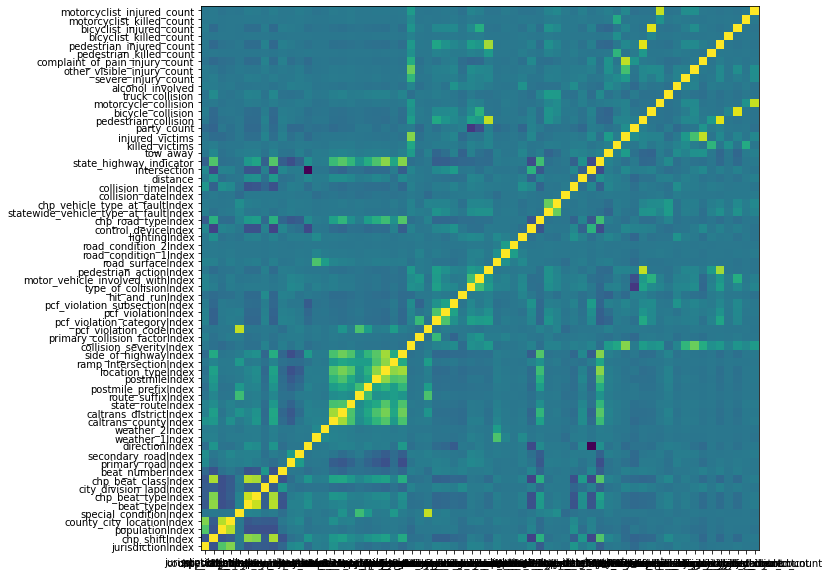

In [15]:
# Python DataFrame for visualization
df_plot = pd.DataFrame(data = corrmatrix, index=cols_interesting2, columns=cols_interesting2)
ScatterPlot(df_plot, 10, 10)

In [16]:
pd.set_option('display.max_rows', 70)
pd.set_option('display.max_columns', 70)
df_plot

,jurisdictionIndex,chp_shiftIndex,populationIndex,county_city_locationIndex,special_conditionIndex,beat_typeIndex,chp_beat_typeIndex,city_division_lapdIndex,chp_beat_classIndex,beat_numberIndex,primary_roadIndex,secondary_roadIndex,directionIndex,weather_1Index,weather_2Index,caltrans_countyIndex,caltrans_districtIndex,state_routeIndex,route_suffixIndex,postmile_prefixIndex,postmileIndex,location_typeIndex,ramp_intersectionIndex,side_of_highwayIndex,collision_severityIndex,primary_collision_factorIndex,pcf_violation_codeIndex,pcf_violation_categoryIndex,pcf_violationIndex,pcf_violation_subsectionIndex,hit_and_runIndex,type_of_collisionIndex,motor_vehicle_involved_withIndex,pedestrian_actionIndex,road_surfaceIndex,road_condition_1Index,road_condition_2Index,lightingIndex,control_deviceIndex,chp_road_typeIndex,statewide_vehicle_type_at_faultIndex,chp_vehicle_type_at_faultIndex,collision_dateIndex,collision_timeIndex,distance,intersection,state_highway_indicator,tow_away,killed_victims,injured_victims,party_count,pedestrian_collision,bicycle_collision,motorcycle_collision,truck_collision,alcohol_involved,severe_injury_count,other_visible_injury_count,complaint_of_pain_injury_count,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count
jurisdictionIndex,1.000000,-0.228609,0.542206,0.679311,-0.005449,-0.212090,-0.173001,-0.185086,-0.213273,-0.111964,0.110973,0.147084,-0.071451,0.047036,0.027667,0.169904,0.055037,0.070908,-0.024895,-0.061441,-0.021006,-0.044784,-0.006909,-0.082792,0.004117,0.047484,0.004457,0.064570,0.056422,0.023598,-0.039669,0.078671,0.075015,0.002633,0.063274,0.014582,0.000627,0.007072,0.101074,-0.179820,0.033494,0.011495,-0.008435,0.201053,0.030078,0.111864,-0.156531,-0.004632,0.007665,-0.015613,-0.088058,0.004519,0.029089,-0.005124,-0.026306,0.037841,0.013308,0.011861,-0.028721,-0.003036,0.004640,0.001377,0.023956,0.004269,-0.007566
chp_shiftIndex,-0.228609,1.000000,-0.227473,-0.179777,0.009125,0.714349,0.677594,-0.175962,0.787103,-0.229337,-0.051775,-0.006396,0.196088,0.052913,0.042186,0.215325,0.264147,0.138505,0.090838,0.185382,0.230715,0.275346,0.076530,0.340912,-0.043670,-0.034427,-0.010758,-0.149762,-0.145688,-0.101089,-0.081726,0.031487,0.005842,-0.075595,0.050745,0.015757,0.012836,0.149224,-0.337652,0.393533,-0.032048,-0.000178,0.016281,-0.146644,0.208534,-0.305271,0.539641,0.098888,0.035263,-0.076203,-0.127981,-0.099275,-0.097733,0.008809,0.122517,0.030585,0.036471,-0.003996,-0.097419,-0.000811,-0.095780,-0.002749,-0.090873,0.005493,0.010832
populationIndex,0.542206,-0.227473,1.000000,0.813530,-0.003580,-0.261296,-0.248995,-0.259225,-0.260538,-0.045734,0.023855,0.034469,-0.026360,-0.001530,-0.001161,0.009942,-0.014884,0.014904,-0.015921,-0.030756,-0.013380,0.005440,0.015336,-0.009610,-0.084333,0.002880,0.001956,0.008488,0.016819,0.012049,-0.059157,-0.036544,-0.022570,-0.026659,-0.002440,0.010281,0.004478,-0.031163,0.079919,-0.075005,0.002744,-0.007745,-0.010528,0.159112,-0.060092,0.065211,-0.058103,-0.037422,-0.016501,-0.081277,0.001900,-0.033030,-0.001671,-0.022069,-0.004606,0.000993,-0.018606,-0.046242,-0.065348,-0.006280,-0.031885,0.001193,-0.006992,-0.006856,-0.027386
county_city_locationIndex,0.679311,-0.179777,0.813530,1.000000,0.000956,-0.214984,-0.175666,-0.183791,-0.191712,0.002651,0.056241,0.103398,-0.030743,0.024405,0.015919,0.159100,0.052228,0.071165,-0.009091,-0.023079,0.004875,0.016291,0.014884,-0.001105,-0.040026,0.030920,0.002648,0.031868,0.025457,0.002310,-0.053248,0.026604,0.031644,-0.015696,0.037511,0.021440,0.006254,-0.007820,0.049720,-0.082785,0.014427,0.002239,-0.006862,0.116676,-0.011097,0.060113,-0.037989,-0.013832,-0.002110,-0.051946,-0.046619,-0.019287,0.004585,-0.002437,-0.020529,0.016055,0.001340,-0.019719,-0.050739,-0.003026,-0.019046,0.000453,0.000861,0.003723,-0.006758
special_conditionIndex,-0.005449,0.009125,-0.003580,0.000956,1.000000,0.084000,0.070366,0.002144,0.019565,-0.064

Zooming in on the correlations to our target variable.

In [18]:
df_plot.sort_values("collision_severityIndex", "columns", ascending=False).loc["collision_severityIndex"]

collision_severityIndex                 1.000000
injured_victims                         0.693092
other_visible_injury_count              0.620508
severe_injury_count                     0.426505
complaint_of_pain_injury_count          0.360021
killed_victims                          0.318472
pedestrian_collision                    0.247537
tow_away                                0.235786
motorcyclist_injured_count              0.233352
pedestrian_injured_count                0.222949
pedestrian_actionIndex                  0.216972
motorcycle_collision                    0.213920
bicyclist_injured_count                 0.198023
bicycle_collision                       0.185049
pedestrian_killed_count                 0.161776
type_of_collisionIndex                  0.161671
motor_vehicle_involved_withIndex        0.137209
pcf_violation_subsectionIndex           0.129773
motorcyclist_killed_count               0.124564
pcf_violationIndex                      0.090969
intersection        

In [17]:
df_plot.to_pickle("correlation_matrix.df")

Lets look at correlations between the most promising predictors.

In [20]:
most_promising_features = ["injured_victims", "other_visible_injury_count", 
                           "severe_injury_count", "complaint_of_pain_injury_count", 
                           "killed_victims", "pedestrian_collision", "tow_away", 
                           "motorcyclist_injured_count", "pedestrian_injured_count",
                           "pedestrian_actionIndex", "motorcycle_collision", 
                           "bicyclist_injured_count", "bicycle_collision",
                           "pedestrian_killed_count", "type_of_collisionIndex",
                           "motor_vehicle_involved_withIndex", "pcf_violation_subsectionIndex",
                            "motorcyclist_killed_count", 
                           ]

df_plot.loc[most_promising_features, most_promising_features]


,injured_victims,other_visible_injury_count,severe_injury_count,complaint_of_pain_injury_count,killed_victims,pedestrian_collision,tow_away,motorcyclist_injured_count,pedestrian_injured_count,pedestrian_actionIndex,motorcycle_collision,bicyclist_injured_count,bicycle_collision,pedestrian_killed_count,type_of_collisionIndex,motor_vehicle_involved_withIndex,pcf_violation_subsectionIndex,motorcyclist_killed_count
injured_victims,1.000000,0.503491,0.225357,0.842607,0.034614,0.088846,0.243852,0.104907,0.111362,0.077292,0.066605,0.086901,0.069183,-0.016051,-0.002799,-0.018047,0.090515,-0.005926
other_visible_injury_count,0.503491,1.000000,0.054635,0.009038,0.034760,0.106502,0.162562,0.153723,0.120430,0.092741,0.117840,0.142795,0.127194,-0.004640,0.137382,0.104994,0.090570,-0.002810
severe_injury_count,0.225357,0.054635,1.000000,-0.013607,0.131324,0.105731,0.076639,0.146190,0.116452,0.098353,0.121705,0.038892,0.031466,0.008977,0.099694,0.064887,0.046358,0.010495
complaint_of_pain_injury_count,0.842607,0.009038,-0.013607,1.000000,-0.011706,0.017854,0.177136,-0.000362,0.033922,0.013889,-0.019112,0.011355,0.001133,-0.018656,-0.107380,-0.098151,0.043863,-0.008052
killed_victims,0.034614,0.034760,0.131324,-0.011706,1.000000,0.083591,0.054310,-0.007152,-0.004723,0.089297,0.049202,-0.011400,0.002838,0.420271,0.064676,0.035266,0.026543,0.344322
pedestrian_collision,0.088846,0.106502,0.105731,0.017854,0.083591,1.000000,-0.113126,-0.023277,0.922132,0.847474,-0.022927,-0.022461,-0.016737,0.222211,0.281387,0.227577,0.116177,-0.005453
tow_away,0.243852,0.162562,0.076639,0.177136,0.054310,-0.113126,1.000000,0.045145,-0.107755,-0.088473,0.036052,-0.116865,-0.127596,0.003828,0.052867,-0.044699,0.055605,0.024091
motorcyclist_injured_count,0.104907,0.153723,0.146190,-0.000362,-0.007152,-0.023277,0.045145,1.000000,-0.020951,-0.018831,0.850990,-0.020149,-0.022438,-0.005871,0.084616,0.050480,0.001377,0.008556
pedestrian_injured_count,0.111362,0.120430,0.116452,0.033922,-0.004723,0.922132,-0.107755,-0.020951,1.000000,0.771919,-0.021358,-0.022212,-0.016785,0.008772,0.258372,0.210399,0.106917,-0.005028
pedestrian_actionIndex,0.077292,0.092741,0.098353,0.013889,0.089297,0.847474,-0.088473,-0.018831,0.771919,1.000000,-0.017853,-0.019176,-0.010801,0.230362,0.233600,0.192414,0.076754,-0.004691


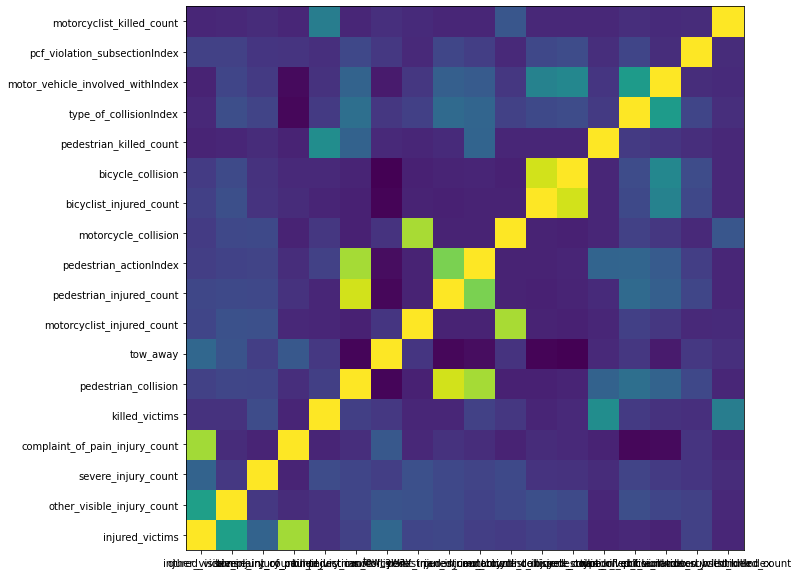

In [21]:
ScatterPlot(df_plot.loc[most_promising_features, most_promising_features], 10, 10)

We decide, out of the pairs of correlated features, to keep only the highest contributor to our target's variability.

In [22]:
most_promising_features = ["injured_victims", "other_visible_injury_count", 
                           "severe_injury_count", "killed_victims", "tow_away", 
                           "motorcyclist_injured_count", "pedestrian_collision",
                           "bicyclist_injured_count", "bicycle_collision",
                           "pedestrian_killed_count", "type_of_collisionIndex",
                           "motor_vehicle_involved_withIndex", "pcf_violation_subsectionIndex",
                            "motorcyclist_killed_count"]

df_plot.loc[most_promising_features, most_promising_features]


,injured_victims,other_visible_injury_count,severe_injury_count,killed_victims,tow_away,motorcyclist_injured_count,pedestrian_injured_count,bicyclist_injured_count,bicycle_collision,pedestrian_killed_count,type_of_collisionIndex,motor_vehicle_involved_withIndex,pcf_violation_subsectionIndex,motorcyclist_killed_count
injured_victims,1.000000,0.503491,0.225357,0.034614,0.243852,0.104907,0.111362,0.086901,0.069183,-0.016051,-0.002799,-0.018047,0.090515,-0.005926
other_visible_injury_count,0.503491,1.000000,0.054635,0.034760,0.162562,0.153723,0.120430,0.142795,0.127194,-0.004640,0.137382,0.104994,0.090570,-0.002810
severe_injury_count,0.225357,0.054635,1.000000,0.131324,0.076639,0.146190,0.116452,0.038892,0.031466,0.008977,0.099694,0.064887,0.046358,0.010495
killed_victims,0.034614,0.034760,0.131324,1.000000,0.054310,-0.007152,-0.004723,-0.011400,0.002838,0.420271,0.064676,0.035266,0.026543,0.344322
tow_away,0.243852,0.162562,0.076639,0.054310,1.000000,0.045145,-0.107755,-0.116865,-0.127596,0.003828,0.052867,-0.044699,0.055605,0.024091
motorcyclist_injured_count,0.104907,0.153723,0.146190,-0.007152,0.045145,1.000000,-0.020951,-0.020149,-0.022438,-0.005871,0.084616,0.050480,0.001377,0.008556
pedestrian_injured_count,0.111362,0.120430,0.116452,-0.004723,-0.107755,-0.020951,1.000000,-0.022212,-0.016785,0.008772,0.258372,0.210399,0.106917,-0.005028
bicyclist_injured_count,0.086901,0.142795,0.038892,-0.011400,-0.116865,-0.020149,-0.022212,1.000000,0.924401,-0.006124,0.121702,0.367204,0.118623,-0.002767
bicycle_collision,0.069183,0.127194,0.031466,0.002838,-0.127596,-0.022438,-0.016785,0.924401,1.000000,-0.005095,0.129512,0.394787,0.129535,-0.003209
pedestrian_killed_count,-0.016051,-0.004640,0.008977,0.420271,0.003828,-0.005871,0.008772,-0.006124,-0.005095,1.000000,0.064914,0.048285,0.021024,-0.001212
